# Loan Approval Analysis


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
# Load Data Set

df = pd.read_csv('loan_sanction_test.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban


In [4]:
# Description about the dataframe

df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [5]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
#Checking duplicates

df.Loan_ID.duplicated().sum()

0

In [7]:
# Checking null values

df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Handling Null values in Gender Column

In [8]:
df.Gender.value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [9]:
df.Gender.fillna('Unknown',inplace=True)

### Handling Null Values in Dependents column

In [10]:
#Checking Null Values in Dependents Column
df.Dependents.value_counts()

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64

In [11]:
df.Dependents.fillna('0',inplace=True)

* "After analyzing the 'Dependents' column, it was identified that some entries have missing values. Given the context of the data, it is reasonable to interpret these null values as instances where individuals have 0 dependents. Therefore, for the purpose of analysis, these null values were considered equivalent to 0 dependents, acknowledging that some applicants might indeed have no dependents.

### Handling Null Values in Self_Employed column

In [12]:
df.Self_Employed.value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [13]:
df.Self_Employed.fillna('Unknown',inplace=True)

### Handling Null Values in LoanAmount column

In [14]:
df.LoanAmount.value_counts().head(20)

LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
120.0     9
187.0     9
130.0     8
108.0     8
135.0     7
80.0      6
200.0     5
122.0     5
104.0     5
160.0     5
176.0     5
185.0     5
131.0     5
126.0     4
123.0     4
Name: count, dtype: int64

* Checking Oultliers in LoanAmount

<Axes: >

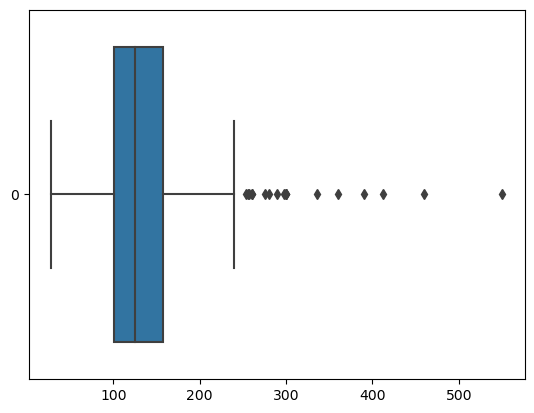

In [15]:
sns.boxplot(df.LoanAmount,orient='h')

In [16]:
df[df.LoanAmount>=300.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban
91,LP001483,Male,Yes,3+,Graduate,No,13518,0,390.0,360.0,1.0,Rural
124,LP001655,Female,No,0,Graduate,No,12500,0,300.0,360.0,0.0,Urban
143,LP001791,Male,Yes,0,Graduate,Yes,32000,0,550.0,360.0,NaN,Semiurban
189,LP002059,Male,Yes,2,Graduate,No,7874,3967,336.0,360.0,1.0,Rural
194,LP002077,Male,Yes,1,Graduate,No,10000,2690,412.0,360.0,1.0,Semiurban
284,LP002570,Female,Yes,2,Graduate,No,10000,11666,460.0,360.0,1.0,Urban
331,LP002825,Male,Yes,3+,Graduate,No,9699,0,300.0,360.0,1.0,Urban


* "After examining the distribution of loan amounts, it was observed that for values greater than 300, applicants generally exhibit good Applicant_Income. Considering this, the decision was made not to replace outliers in the 'LoanAmount' column. Instead, null values in this column were filled using the mean value. This approach aims to retain the original distribution of loan amounts while addressing missing values by imputing them with a central tendency measure. This strategy acknowledges the potential significance of high loan amounts and aims to maintain the integrity of the data for comprehensive analysis."

In [17]:
#Fill Null Values for mean
df.LoanAmount.mean()

136.13259668508286

In [18]:
x = df.LoanAmount.mean()

In [19]:
x

136.13259668508286

In [20]:
df.LoanAmount.fillna(x,inplace=True)

* Handling outliers in the 'CoapplicantIncome' column requires careful consideration, as outliers can significantly impact statistical analyses.

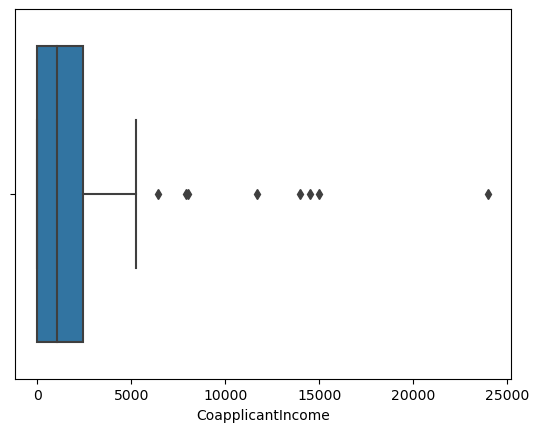

In [21]:
# Visualize outliers in 'CoapplicantIncome' using a box plot
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

In [22]:
df[df.CoapplicantIncome>=5000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural
69,LP001361,Male,Yes,0,Graduate,No,2458,5105,188.0,360.0,0.0,Rural
85,LP001452,Male,Yes,2,Graduate,No,4635,8000,102.0,180.0,1.0,Rural
123,LP001652,Male,No,0,Graduate,No,2500,6414,187.0,360.0,0.0,Rural
230,LP002294,Male,No,0,Graduate,No,14911,14507,130.0,360.0,1.0,Semiurban
236,LP002321,Female,No,0,Graduate,No,2274,5211,117.0,360.0,0.0,Semiurban
237,LP002325,Male,Yes,2,Not Graduate,No,6166,13983,102.0,360.0,1.0,Rural
284,LP002570,Female,Yes,2,Graduate,No,10000,11666,460.0,360.0,1.0,Urban
311,LP002747,Female,No,3+,Graduate,No,2366,5272,153.0,360.0,0.0,Rural


* After meticulous scrutiny of the DataFrame, anomalies were detected in the 'CoapplicantIncome' values for specific entries, notably at serial no. 24 and serial no. 237. Given the inconsistency between the observed values (e.g., 24000 and 13983) and the contextual information (e.g., residing in a rural area and being a non-graduate), a decision was made to treat these entries as potential errors.

* To maintain data integrity, the 'CoapplicantIncome' values for these specific entries were replaced with the mean value. This approach aims to address outliers or inaccuracies while ensuring that the corrected values align more closely with the overall distribution of coapplicant incomes. By taking this corrective step, we strive to enhance the accuracy and reliability of the data for subsequent analyses.

In [23]:
# Fill CoapplicantIncome outliers with mean
df.CoapplicantIncome.mean()

1569.5776566757493

In [24]:
df.CoapplicantIncome=np.where(df.CoapplicantIncome==24000,1569.0,df.CoapplicantIncome)

In [25]:
df.CoapplicantIncome=np.where(df.CoapplicantIncome==24000,1569.0,df.CoapplicantIncome)

### Handling missing values in the 'Loan_Amount_Term' Column

In [27]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [28]:
#  Fill missing values in 'Loan_Amount_Term' with median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)


### Handling missing values in the 'Credit_History' column, which typically represents binary data (1.0 for credit history available, 0.0 for not available

In [29]:
# Fill missing values in 'Credit_History' with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

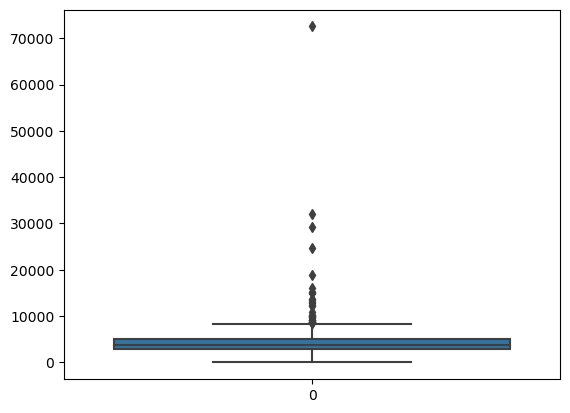

In [31]:
sns.boxplot(df.ApplicantIncome)

In [32]:
df[df.ApplicantIncome>=10000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2,Graduate,Unknown,13633,0.0,280.000000,240.0,1.0,Urban
13,LP001094,Male,Yes,2,Graduate,Unknown,12173,0.0,166.000000,360.0,0.0,Semiurban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0.0,360.000000,360.0,1.0,Urban
91,LP001483,Male,Yes,3+,Graduate,No,13518,0.0,390.000000,360.0,1.0,Rural
124,LP001655,Female,No,0,Graduate,No,12500,0.0,300.000000,360.0,0.0,Urban
143,LP001791,Male,Yes,0,Graduate,Yes,32000,0.0,550.000000,360.0,1.0,Semiurban
144,LP001794,Male,Yes,2,Graduate,Yes,10890,0.0,260.000000,12.0,1.0,Rural
145,LP001797,Female,No,0,Graduate,No,12941,0.0,150.000000,300.0,1.0,Urban
179,LP002017,Male,Yes,3+,Graduate,No,15312,0.0,187.000000,360.0,1.0,Urban
184,LP002045,Male,Yes,3+,Graduate,No,10166,750.0,150.000000,360.0,1.0,Urban


* After thorough examination of the 'ApplicantIncome' column, an outlier was identified with a substantially high value of 725299. Given the potential impact of this outlier on the overall distribution and to ensure a more representative measure of central tendency, a decision was made to treat this specific entry as an outlier.

* To mitigate the influence of the outlier, the 'ApplicantIncome' value for the entry with the value 725299 was replaced with the mean value. This adjustment is intended to align the corrected value more closely with the typical range of applicant incomes, facilitating a more accurate representation of the data for subsequent analyses.



In [47]:
#Replacing outliers from mean

In [33]:
df.ApplicantIncome.mean()

4805.599455040872

In [34]:
df.ApplicantIncome = np.where(df.ApplicantIncome==72529,4805,df.ApplicantIncome)

# Visualization

<Axes: >

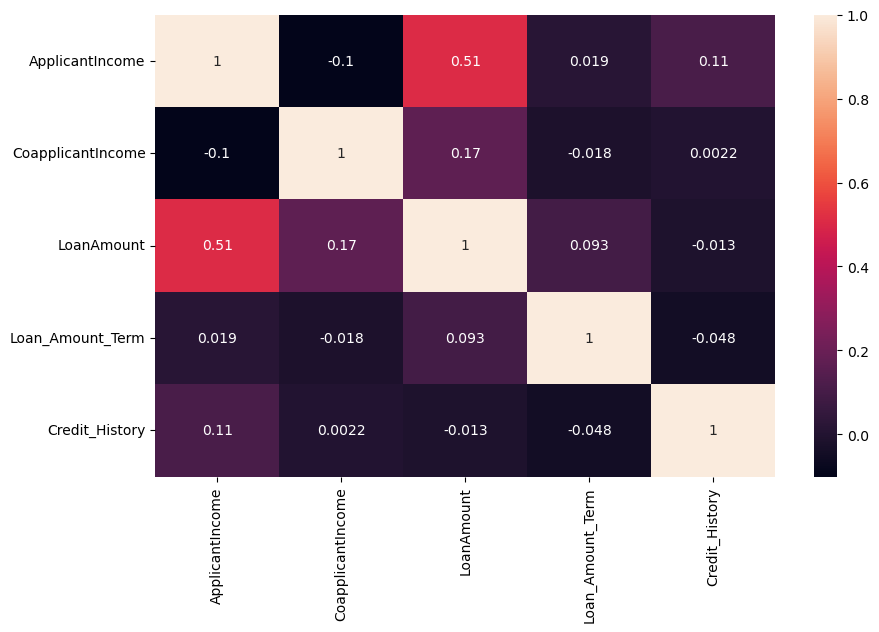

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

* Based on the heatmap of correlations between different variables related to loan applications, it appears that there is a strong positive correlation of 0.51 between ApplicantIncome and LoanAmount. This suggests that as the applicant’s income increases, the loan amount also tends to increase. Other notable correlations include a positive correlation of 0.17 between LoanAmount and CoapplicantIncome, and a positive correlation of 0.11 between ApplicantIncome and Credit_History.

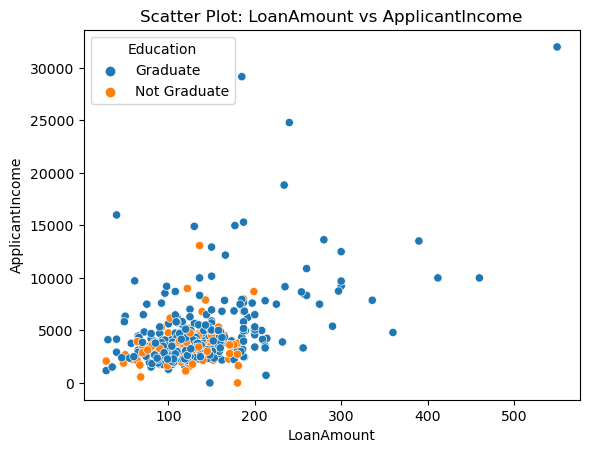

In [36]:
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=df,hue=df.Education)
plt.title('Scatter Plot: LoanAmount vs ApplicantIncome')
plt.show()



* The scatter plot suggests that there is a positive correlation between applicant income and loan amount, indicating that individuals with higher incomes tend to request larger loans. Additionally, the plot shows that there is no significant difference in loan amount and applicant income between graduates and non-graduates.

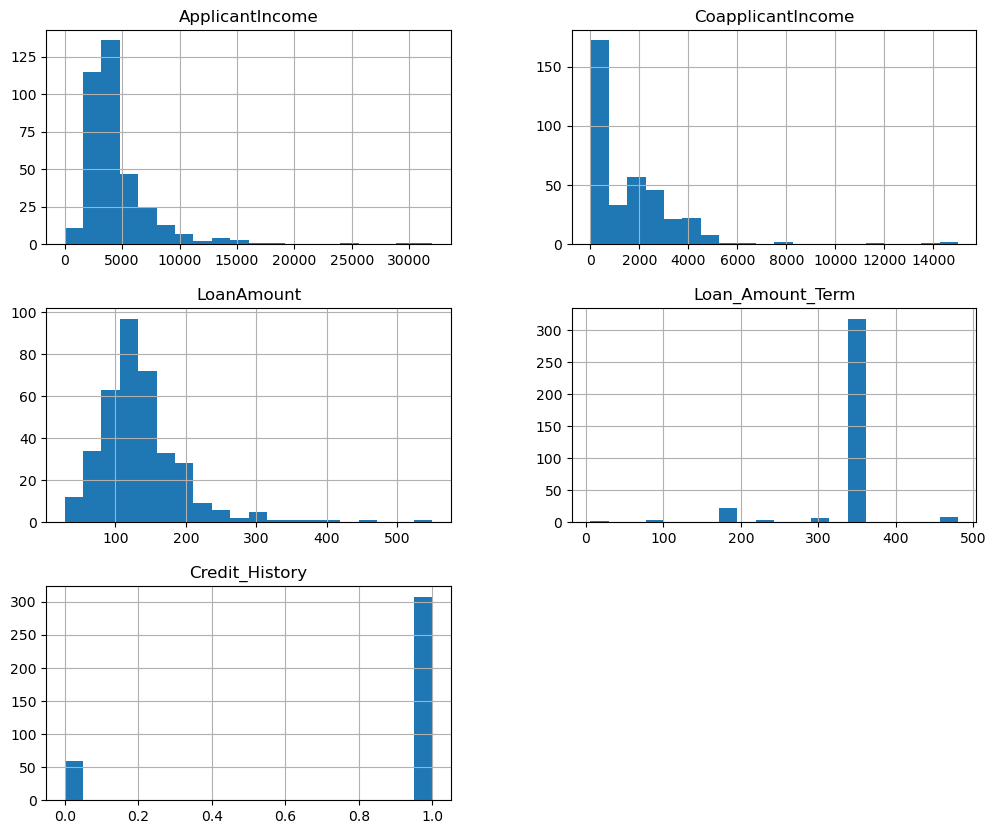

In [37]:
# Histograms for numeric variables
df.hist(figsize=(12, 10), bins=20)
plt.show()



* The histograms show that the majority of applicants have lower income and loan amounts, but a good credit history, with the most common loan term being 360.

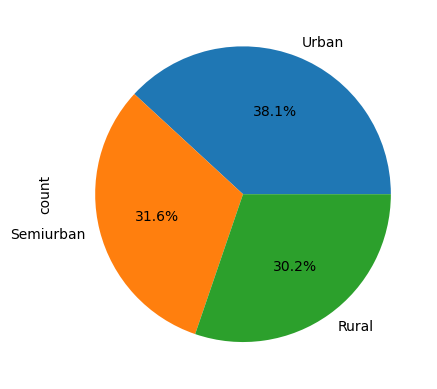

In [38]:

# Pie Charts for categorical variables
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


* The pie chart shows that the highest count is from urban areas, followed by semiurban and rural areas, indicating that urban areas have the highest population density.

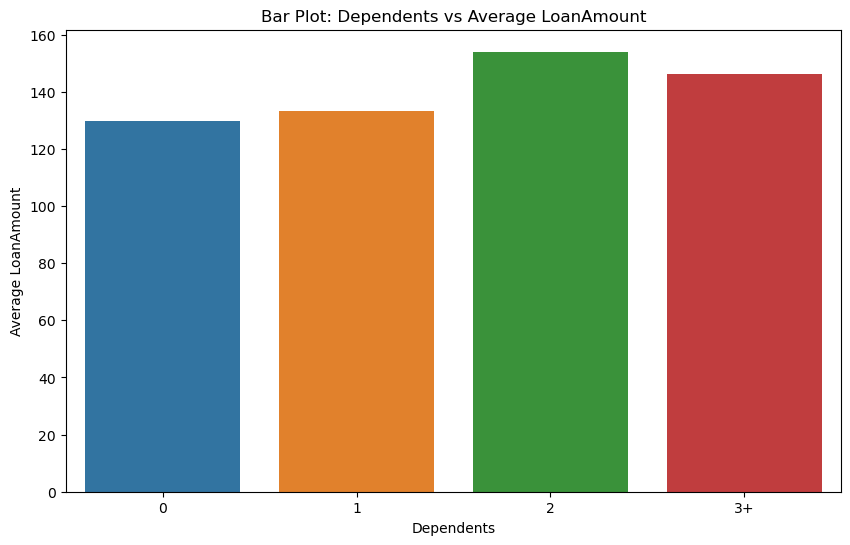

In [39]:

# Bar plot between 'Dependents' and average 'LoanAmount'
plt.figure(figsize=(10, 6))
sns.barplot(x='Dependents', y='LoanAmount', data=df, estimator='mean', ci=None)
plt.title('Bar Plot: Dependents vs Average LoanAmount')
plt.xlabel('Dependents')
plt.ylabel('Average LoanAmount')
plt.show()


* Based on the bar plot titled “Bar Plot: Dependents vs Average LoanAmount”, it appears that individuals with 2 dependents tend to have a higher average loan amount, followed by those with 3+ dependents, 1 dependent, and no dependents.

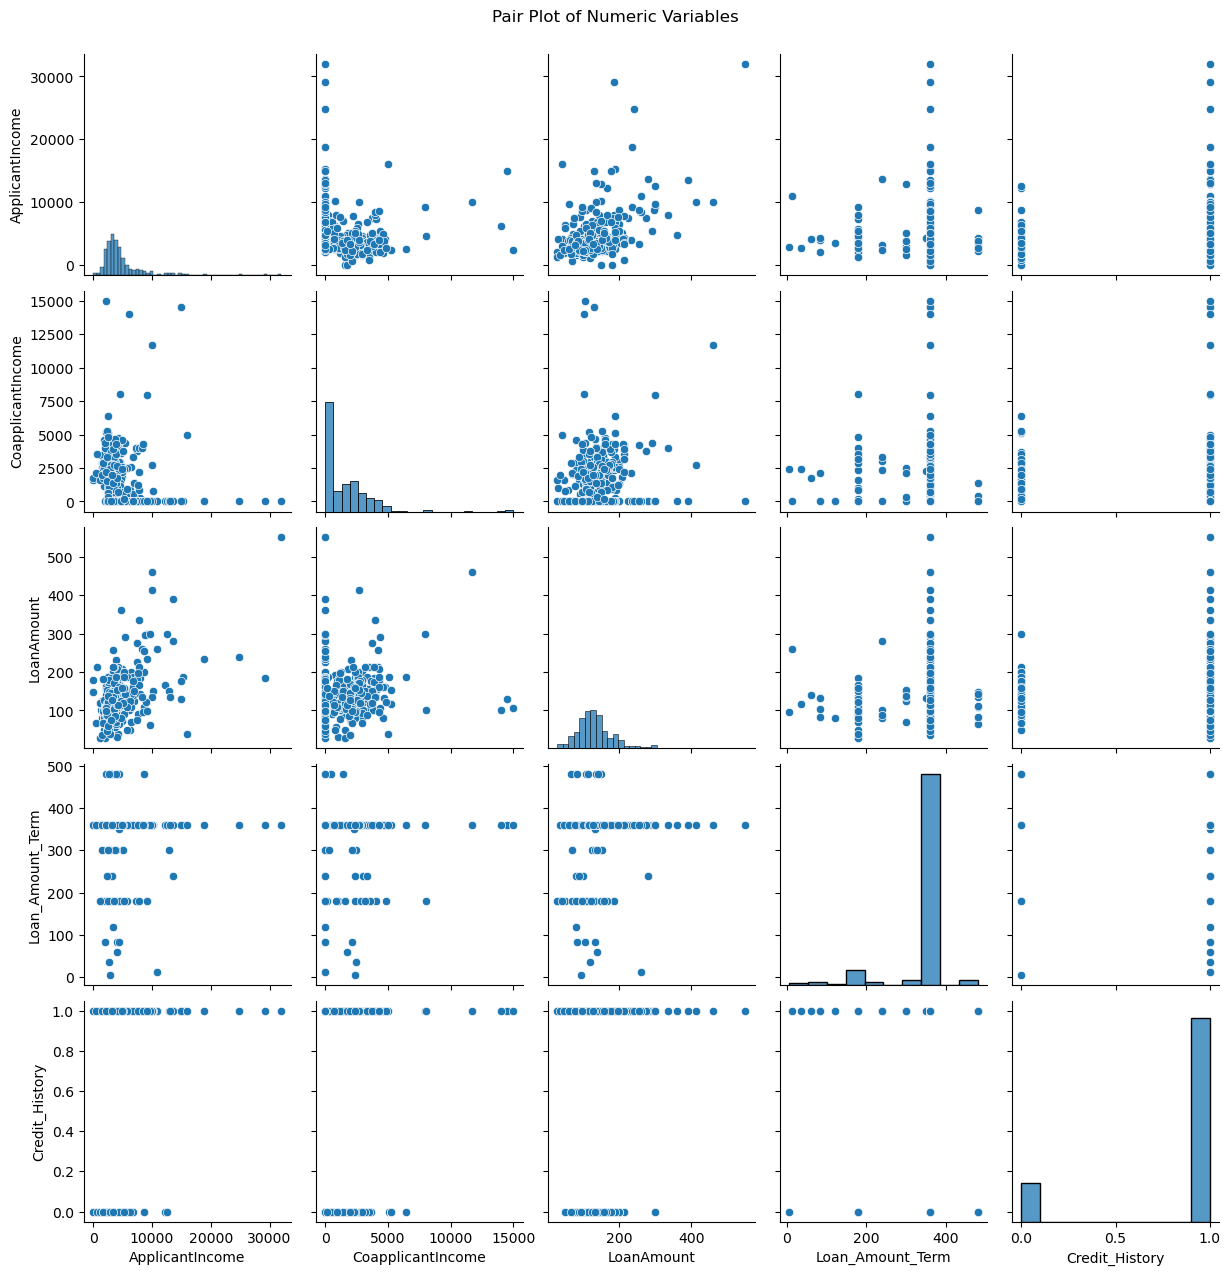

In [45]:
# Select numeric columns for pair plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create pair plot
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

* The pair plot analysis reveals a positive correlation between ApplicantIncome and LoanAmount, suggesting that higher income leads to a higher loan eligibility.We can also see that the Credit_History variable has a strong correlation with the Loan_Amount, indicating that applicants with a good credit history are more likely to get their loans approved.